<a href="https://colab.research.google.com/github/anhelus/pcs-exercises/blob/master/02_ml/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Un semplice problema di apprendimento**

Un problema di apprendimento considera un insieme di $n$ campioni, provando a caratterizzare le relazioni esistenti all'interno dei diversi attributi, o *feature*. In particolare, questi problemi ricadono in alcune categorie ben definite.

Nei problemi di *apprendimento supervisionato*, abbiamo a disposizione una serie di dati precedentemente "visionati" da un esperto di dominio. In particolare:

* in un problema di *classificazione*, i campioni possono appartenere a due o più classi; l'obiettivo è capire come predire la classe di un campione non etichettato;
* in un problema di *regressione*, l'uscita da predire è fatta da una (o più) variabili continue.

Nei problemi di *apprendimento non supervisionato*, invece, i dati su cui effettuare l'addestramento sono soltanto un insieme di vettori $x$, cui non sono associati i corrispondenti valori di classe/uscita. In questi casi, l'obiettivo è scoprire l'esistenza di gruppi "simili" di dati (*clustering*), o anche determinare la distribuzione dei campioni nello spazio delle feature (*density estimation*), o ancora proiettare i dati da uno spazio ad alta dimensionalità in uno spazio a due o tre dimensioni a scopo di visualizzazione.

Una delle pratiche comuni nei problemi di apprendimento è quello di suddividere l'insieme dei dati a nostra disposizione in un set di *addestramento*, sul quale sarà (per l'appunto) addestrato il modello, ed uno di *validazione*, usato per verificare i risultati ottenuti dal modello addestrato. Proviamo a fare un esempio.

**Caricamento di un dataset**

Così come Seaborn, anche Scikit Learn ha a sua disposizione alcuni semplici dataset già integrati; tra questi, ricordiamo [Iris](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) e [Digits](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html), usati spesso per la classificazione, e [Diabetes](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), usato invece per la regressione. Per caricarli, dovremo usare l'apposita funzione `load_*`, dove ad `*` dovremo sostituire il nome del dataset. Ad esempio:

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm

digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

I campioni sono memorizzati all'interno del campo `.data`:

In [2]:
digits.data.shape

(1797, 64)

In questo caso, avremo un array bidimensionale di dimensioni $1797 \times 64$, nel quale ogni riga è associata un'immagine caratterizzata da $64$ diversi valori. Nella proprietà `.target` è invece memorizzato il *ground truth* del dataset, ovvero il numero corrispondente al campione che stiamo provando ad apprendere:

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

I valori originari, ovvero quelli associati alla singola immagine, sono contenuti nella proprietà `images`; la useremo in seguito.

Il task associato al dataset digits prevede quindi di valutare, data una singola immagine, quale cifra questa rappresenti. In particolare, abbiamo campioni associati a $10$ possibili classi, ovvero alle cifre che vanno da $0$ a $9$; su questi campioni andremo ad addestrare un classificatore (che ricordiamo essere un oggetto che implementa i metodi `fit()` e `predict()`) per predire la classe cui appartiene un singolo campione.

Proviamo ad utilizzare una semplice SVM:

In [4]:
from sklearn.svm import SVC

clf = SVC()

# clf.fit(X, y)

Il classificatore (l'oggetto `clf`) sarà per prima cosa addestrato sul dataset di training; in questo caso, utilizzeremo tutte le immagini del nostro dataset, eccetto le ultime 100.

In [5]:
clf.fit(digits.data[:-100], digits.target[:-100])

SVC()

Possiamo usare il classificatore appena addestrato per predire dei nuovi valori mediante il metodo `predict()`. In particolare, proviamo a predire la classe associata all'ultima immagine:

In [6]:
clf.predict(digits.data[-1:])

array([8])

Il classificatore predice l'ultima immagine come un `8`. Verifichiamo facendo il plot dell'immagine a schermo:

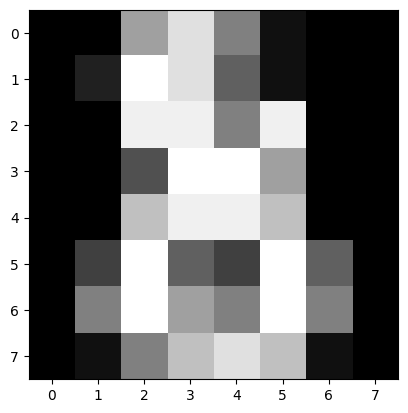

In [7]:
plt.imshow(digits.images[-1], cmap='gray')
plt.show()

Come possiamo vedere, le immagini sono a bassa risoluzione, per cui il task è estremamente complesso.
